# Virat Kohli - ODI Analysis

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor , XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

### Importing Clean Data

In [2]:
# df = pd.read_excel('ViratKohli-ODI.xlsx')
df = pd.read_csv('./Data/Data-Regression.csv')

In [3]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


### Data Description and Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match             308 non-null    int64  
 1   Innings           296 non-null    float64
 2   Date              308 non-null    object 
 3   M/Inns            308 non-null    object 
 4   Posn              308 non-null    int64  
 5   Versus            308 non-null    object 
 6   Ground            308 non-null    object 
 7   How Dismissed     308 non-null    object 
 8   Runs              308 non-null    int64  
 9   B/F               308 non-null    int64  
 10  S/R               308 non-null    float64
 11  Progressive-Runs  308 non-null    int64  
 12  Progressive-B/F   308 non-null    int64  
 13  Progressive-Avg   308 non-null    float64
 14  Progressive-S/R   308 non-null    float64
 15  Captain           308 non-null    object 
 16  Dismissal Type    308 non-null    object 
 1

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match,308.0,154.500000,89.056162,1.0000,77.7500,154.5000,231.2500,308.0000
Innings,296.0,148.500000,85.592056,1.0000,74.7500,148.5000,222.2500,296.0000
Posn,308.0,3.061688,0.909286,0.0000,3.0000,3.0000,3.0000,7.0000
Runs,308.0,47.262987,43.310924,0.0000,8.7500,34.0000,80.2500,183.0000
B/F,308.0,50.464286,39.894919,0.0000,13.0000,43.0000,83.0000,159.0000
S/R,308.0,77.269286,39.081306,0.0000,59.9050,80.9500,100.0000,209.0900
Progressive-Runs,308.0,6910.480519,4375.897862,12.0000,2997.2500,6473.0000,11105.0000,14557.0000
Progressive-B/F,308.0,7578.116883,4596.356583,22.0000,3581.7500,7195.0000,11923.5000,15543.0000
Progressive-Avg,308.0,52.078214,6.768001,12.0000,49.1650,52.1700,57.8175,60.3100
Progressive-S/R,308.0,87.948377,6.428469,54.5500,83.9075,89.9100,92.9300,93.8500


### Null Values

In [6]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
City                 0
State/Province      13
Country              0
ICC Region           0
Latitude             0
longitude            0
SENA                 0
dtype: int64

### Machine Learning

In [7]:
ml = df.copy()

In [8]:
ml.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


In [9]:
ml = ml[['Match','Date','M/Inns','Versus','Country','SENA','Captain','B/F','Runs']]

In [10]:
ml.head()

,Match,Date,M/Inns,Versus,Country,SENA,Captain,B/F,Runs
0,1,2008-08-18,1st,Sri Lanka,Sri Lanka,0,No,22,12
1,2,2008-08-20,2nd,Sri Lanka,Sri Lanka,0,No,67,37
2,3,2008-08-24,1st,Sri Lanka,Sri Lanka,0,No,38,25
3,4,2008-08-27,1st,Sri Lanka,Sri Lanka,0,No,66,54
4,5,2008-08-29,2nd,Sri Lanka,Sri Lanka,0,No,46,31


### Preprocessing

### Using FunctionTransformer to transform the columns according to our logic

In [26]:
def map_columns(ml):
    df = ml.copy()
    
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df.drop('Date',inplace=True,axis=1)
    
    df['M/Inns'] = df['M/Inns'].map({
        '1st': 1,
        '2nd': 2,
        'N/A - No Result': 0
    })
    
    df['Captain'] = df['Captain'].map({
        'Yes': 1,
        'No': 0
    })
    
    return df

In [27]:
mapping_transformer = FunctionTransformer(map_columns)

In [28]:
categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

In [29]:
preprocessor = ColumnTransformer(transformers=[('cat_enc', categorical_encoder, ['Versus', 'Country'])], remainder='passthrough')  # keep other columns)

In [49]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cb = CatBoostRegressor()
lgb = LGBMRegressor()

In [50]:
models = [lr,kn,dt,rf,ada,gb,xgb,xgbrf,lgb]

In [52]:
x = ml.drop('Runs',axis=1)
y = ml[['Runs']]

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.05,shuffle=False)

### Linear Regression

In [56]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(xtrain,ytrain)
lr_preds = pipeline.predict(xtest)
lr_r2 = r2_score(ytest,lr_preds)
lr_mae = mean_absolute_error(ytest,lr_preds)
lr_mse = mean_squared_error(ytest,lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('r2 Score: ',lr_r2)
print('MAE: ',lr_mae)
print('RMSE: ',lr_rmse)

r2 Score:  0.9487612602215852
MAE:  7.034058260150232
RMSE:  9.54936363108497


### KNN

In [57]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', KNeighborsRegressor())
])

pipeline.fit(xtrain,ytrain)
kn_preds = pipeline.predict(xtest)
kn_r2 = r2_score(ytest,kn_preds)
kn_mae = mean_absolute_error(ytest,kn_preds)
kn_mse = mean_squared_error(ytest,kn_preds)
kn_rmse = np.sqrt(kn_mse)

print('r2 Score: ',kn_r2)
print('MAE: ',kn_mae)
print('RMSE: ',kn_rmse)

r2 Score:  0.8934253424552301
MAE:  9.4375
RMSE:  13.772163954876516


### Decision Tree

In [58]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', DecisionTreeRegressor())
])

pipeline.fit(xtrain,ytrain)
dt_preds = pipeline.predict(xtest)
dt_r2 = r2_score(ytest,dt_preds)
dt_mae = mean_absolute_error(ytest,dt_preds)
dt_mse = mean_squared_error(ytest,dt_preds)
dt_rmse = np.sqrt(dt_mse)

print('r2 Score: ',dt_r2)
print('MAE: ',dt_mae)
print('RMSE: ',dt_rmse)

r2 Score:  0.8962965889461751
MAE:  10.8125
RMSE:  13.585378169193525


### Random Forest

In [60]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline.fit(xtrain,ytrain)
rf_preds = pipeline.predict(xtest)
rf_r2 = r2_score(ytest,rf_preds)
rf_mae = mean_absolute_error(ytest,rf_preds)
rf_mse = mean_squared_error(ytest,rf_preds)
rf_rmse = np.sqrt(rf_mse)

print('r2 Score: ',rf_r2)
print('MAE: ',rf_mae)
print('RMSE: ',rf_rmse)

r2 Score:  0.9264192867976129
MAE:  7.551250000000001
RMSE:  11.443456099448278


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


### Adaboost

In [63]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', AdaBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
ada_preds = pipeline.predict(xtest)
ada_r2 = r2_score(ytest,ada_preds)
ada_mae = mean_absolute_error(ytest,ada_preds)
ada_mse = mean_squared_error(ytest,ada_preds)
ada_rmse = np.sqrt(ada_mse)

print('r2 Score: ',ada_r2)
print('MAE: ',ada_mae)
print('RMSE: ',ada_rmse)

r2 Score:  0.9049063564715312
MAE:  9.241245031450376
RMSE:  13.009210926642982


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gradient Boosting

In [64]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(xtrain,ytrain)
gb_preds = pipeline.predict(xtest)
gb_r2 = r2_score(ytest,gb_preds)
gb_mae = mean_absolute_error(ytest,gb_preds)
gb_mse = mean_squared_error(ytest,gb_preds)
gb_rmse = np.sqrt(gb_mse)

print('r2 Score: ',gb_r2)
print('MAE: ',gb_mae)
print('RMSE: ',gb_rmse)

r2 Score:  0.9248733894077514
MAE:  8.269595587849063
RMSE:  11.563042161630772


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  LGBM

In [65]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LGBMRegressor())
])

pipeline.fit(xtrain,ytrain)
lgb_preds = pipeline.predict(xtest)
lgb_r2 = r2_score(ytest,lgb_preds)
lgb_mae = mean_absolute_error(ytest,lgb_preds)
lgb_mse = mean_squared_error(ytest,lgb_preds)
lgb_rmse = np.sqrt(lgb_mse)

print('r2 Score: ',lgb_r2)
print('MAE: ',lgb_mae)
print('RMSE: ',lgb_rmse)

r2 Score:  0.9348260991242352
MAE:  7.403313921267264
RMSE:  10.76990987955284


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Catboost

In [66]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', CatBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
cb_preds = pipeline.predict(xtest)
cb_r2 = r2_score(ytest,cb_preds)
cb_mae = mean_absolute_error(ytest,cb_preds)
cb_mse = mean_squared_error(ytest,cb_preds)
cb_rmse = np.sqrt(cb_mse)

print('r2 Score: ',cb_r2)
print('MAE: ',cb_mae)
print('RMSE: ',cb_rmse)

Learning rate set to 0.033706
0:	learn: 42.4317865	total: 157ms	remaining: 2m 36s
1:	learn: 41.5916029	total: 158ms	remaining: 1m 18s
2:	learn: 40.7550754	total: 159ms	remaining: 52.9s
3:	learn: 39.9753552	total: 160ms	remaining: 39.9s
4:	learn: 39.0909628	total: 161ms	remaining: 32.1s
5:	learn: 38.3097598	total: 162ms	remaining: 26.9s
6:	learn: 37.4198596	total: 163ms	remaining: 23.2s
7:	learn: 36.7319777	total: 164ms	remaining: 20.4s
8:	learn: 35.9377281	total: 165ms	remaining: 18.2s
9:	learn: 35.1960166	total: 166ms	remaining: 16.5s
10:	learn: 34.4492153	total: 167ms	remaining: 15s
11:	learn: 33.5997214	total: 168ms	remaining: 13.9s
12:	learn: 32.8366470	total: 169ms	remaining: 12.8s
13:	learn: 32.1397297	total: 170ms	remaining: 12s
14:	learn: 31.4466364	total: 171ms	remaining: 11.2s
15:	learn: 30.9217144	total: 172ms	remaining: 10.6s
16:	learn: 30.2336531	total: 173ms	remaining: 10s
17:	learn: 29.5552573	total: 174ms	remaining: 9.47s
18:	learn: 28.9629634	total: 174ms	remaining: 9s

260:	learn: 7.8962736	total: 369ms	remaining: 1.04s
261:	learn: 7.8801255	total: 370ms	remaining: 1.04s
262:	learn: 7.8738425	total: 370ms	remaining: 1.04s
263:	learn: 7.8586703	total: 371ms	remaining: 1.03s
264:	learn: 7.8470583	total: 372ms	remaining: 1.03s
265:	learn: 7.8248333	total: 373ms	remaining: 1.03s
266:	learn: 7.8139345	total: 374ms	remaining: 1.03s
267:	learn: 7.8079918	total: 375ms	remaining: 1.02s
268:	learn: 7.8009816	total: 375ms	remaining: 1.02s
269:	learn: 7.7963079	total: 376ms	remaining: 1.02s
270:	learn: 7.7887387	total: 377ms	remaining: 1.01s
271:	learn: 7.7807054	total: 378ms	remaining: 1.01s
272:	learn: 7.7794733	total: 379ms	remaining: 1.01s
273:	learn: 7.7667906	total: 380ms	remaining: 1s
274:	learn: 7.7584408	total: 380ms	remaining: 1s
275:	learn: 7.7351925	total: 381ms	remaining: 1s
276:	learn: 7.7179867	total: 382ms	remaining: 997ms
277:	learn: 7.6996524	total: 383ms	remaining: 994ms
278:	learn: 7.6924643	total: 384ms	remaining: 992ms
279:	learn: 7.6884161

507:	learn: 5.3146049	total: 566ms	remaining: 548ms
508:	learn: 5.3054329	total: 574ms	remaining: 554ms
509:	learn: 5.3019895	total: 575ms	remaining: 553ms
510:	learn: 5.2920235	total: 576ms	remaining: 551ms
511:	learn: 5.2822036	total: 577ms	remaining: 550ms
512:	learn: 5.2753761	total: 578ms	remaining: 548ms
513:	learn: 5.2747625	total: 579ms	remaining: 547ms
514:	learn: 5.2613807	total: 580ms	remaining: 546ms
515:	learn: 5.2530914	total: 581ms	remaining: 545ms
516:	learn: 5.2414142	total: 582ms	remaining: 544ms
517:	learn: 5.2382019	total: 583ms	remaining: 542ms
518:	learn: 5.2357284	total: 584ms	remaining: 541ms
519:	learn: 5.2239109	total: 584ms	remaining: 539ms
520:	learn: 5.2219150	total: 585ms	remaining: 538ms
521:	learn: 5.2101193	total: 586ms	remaining: 537ms
522:	learn: 5.2066658	total: 587ms	remaining: 535ms
523:	learn: 5.2035466	total: 588ms	remaining: 534ms
524:	learn: 5.1984874	total: 588ms	remaining: 532ms
525:	learn: 5.1959946	total: 589ms	remaining: 531ms
526:	learn: 

686:	learn: 4.0436336	total: 750ms	remaining: 342ms
687:	learn: 4.0307342	total: 752ms	remaining: 341ms
688:	learn: 4.0232574	total: 753ms	remaining: 340ms
689:	learn: 4.0185634	total: 754ms	remaining: 339ms
690:	learn: 4.0146984	total: 755ms	remaining: 338ms
691:	learn: 4.0043890	total: 757ms	remaining: 337ms
692:	learn: 4.0011372	total: 758ms	remaining: 336ms
693:	learn: 3.9919637	total: 759ms	remaining: 335ms
694:	learn: 3.9856861	total: 760ms	remaining: 334ms
695:	learn: 3.9818018	total: 761ms	remaining: 332ms
696:	learn: 3.9752750	total: 762ms	remaining: 331ms
697:	learn: 3.9699430	total: 763ms	remaining: 330ms
698:	learn: 3.9654160	total: 772ms	remaining: 332ms
699:	learn: 3.9608836	total: 773ms	remaining: 331ms
700:	learn: 3.9580562	total: 774ms	remaining: 330ms
701:	learn: 3.9524914	total: 775ms	remaining: 329ms
702:	learn: 3.9470332	total: 777ms	remaining: 328ms
703:	learn: 3.9451119	total: 778ms	remaining: 327ms
704:	learn: 3.9385877	total: 779ms	remaining: 326ms
705:	learn: 

864:	learn: 3.1337304	total: 933ms	remaining: 146ms
865:	learn: 3.1306593	total: 934ms	remaining: 145ms
866:	learn: 3.1266800	total: 935ms	remaining: 143ms
867:	learn: 3.1191874	total: 936ms	remaining: 142ms
868:	learn: 3.1156327	total: 937ms	remaining: 141ms
869:	learn: 3.1122001	total: 938ms	remaining: 140ms
870:	learn: 3.1108996	total: 939ms	remaining: 139ms
871:	learn: 3.1039676	total: 939ms	remaining: 138ms
872:	learn: 3.1029020	total: 940ms	remaining: 137ms
873:	learn: 3.0998769	total: 941ms	remaining: 136ms
874:	learn: 3.0927989	total: 942ms	remaining: 135ms
875:	learn: 3.0910280	total: 943ms	remaining: 133ms
876:	learn: 3.0886305	total: 944ms	remaining: 132ms
877:	learn: 3.0853215	total: 944ms	remaining: 131ms
878:	learn: 3.0814036	total: 945ms	remaining: 130ms
879:	learn: 3.0796538	total: 946ms	remaining: 129ms
880:	learn: 3.0743723	total: 947ms	remaining: 128ms
881:	learn: 3.0724476	total: 948ms	remaining: 127ms
882:	learn: 3.0690365	total: 949ms	remaining: 126ms
883:	learn: 

### Predictions

In [192]:
lrpreds = []
for i in lr_preds:
    lrpreds.append(i[0])

In [193]:
ytest['Preds'] = np.absolute(lrpreds)

In [194]:
ytest['Preds'] = ytest['Preds'].astype('int64')

In [195]:
ytest['Diffrence'] = ytest['Preds'] - ytest['Runs']

### Post Processing

In [196]:
xtest['Versus'] = le_versus.inverse_transform(xtest['Versus'])
xtest['Country'] = le_country.inverse_transform(xtest['Country'])

In [206]:
xtest['Actual Score'] = ytest['Runs']#.astype(str) + " Runs" 
xtest['Predicted Score'] = ytest['Preds']#.astype(str) + " Runs"

In [198]:
xtest['Prediction Error'] = ytest['Diffrence']#.astype(str) + ' Runs'

In [199]:
xtest['Match Info'] = "Against " + xtest['Versus'] + " at " + xtest['Country'] 

In [200]:
xtest['Month'] = xtest['Month'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

In [201]:
xtest['Date'] = xtest['Month'] +" " +xtest['Year'].astype(str)

In [202]:
xtest = xtest[['Match','Match Info','Date','B/F','Actual Score','Predicted Score','Prediction Error']]

### Results

In [207]:
xtest

,Match,Match Info,Date,B/F,Actual Score,Predicted Score,Prediction Error
292,293,Against Sri Lanka at Sri Lanka,August 2024,32,24,29,5
293,294,Against Sri Lanka at Sri Lanka,August 2024,19,14,16,2
294,295,Against Sri Lanka at Sri Lanka,August 2024,18,20,15,-5
295,296,Against England at India,February 2025,8,5,4,-1
296,297,Against England at India,February 2025,55,52,53,1
297,298,Against Bangladesh at UAE,February 2025,38,22,35,13
298,299,Against Pakistan at UAE,February 2025,111,100,110,10
299,300,Against New Zealand at UAE,March 2025,14,11,10,-1
300,301,Against Australia at UAE,March 2025,98,84,97,13
301,302,Against New Zealand at UAE,March 2025,2,1,1,0


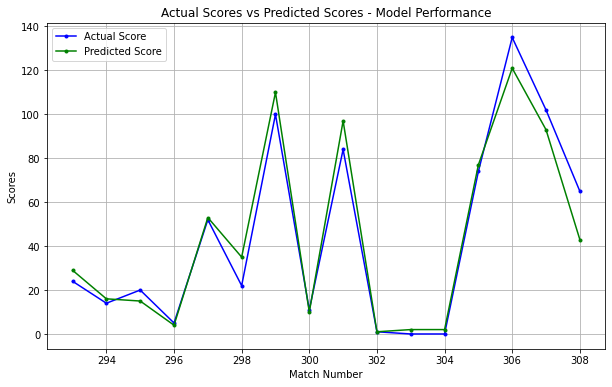

In [208]:
# Matplotlib

print('\n\n')
plt.figure(figsize=(10,6))
plt.plot(xtest['Match'].to_numpy(), xtest['Actual Score'].to_numpy(), color = 'blue',marker = '.', label = 'Actual Score')
plt.plot(xtest['Match'].to_numpy(), xtest['Predicted Score'].to_numpy() , color = 'green', marker = '.' , label = 'Predicted Score')
plt.legend()
plt.title('Actual Scores vs Predicted Scores - Model Performance')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [209]:


## Plotly
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=xtest['Match'],
        y=xtest['Actual Score'],
        mode='lines+markers',
        name='Actual Score',
        marker=dict(symbol='circle'),
        line=dict(width=2)
    )
)

fig.add_trace(
    go.Scatter(
        x=xtest['Match'],
        y=xtest['Predicted Score'],
        mode='lines+markers',
        name='Predicted Score',
        marker=dict(symbol='circle'),
        line=dict(width=2)
    )
)

fig.update_layout(
    title='Actual Scores vs Predicted Scores - Model Performance',
    xaxis_title='Match Number',
    yaxis_title='Scores',
    width=1000,
    height=600,
    template='plotly_white',
    legend=dict(x=0.01, y=0.99)
)

fig.show()


In [ ]:
print('r2 Score: ',round(lr_r2,2))
print('MAE: ',round(lr_mae,2))
print('RMSE: ',round(lr_rmse,2))

### Let's now train our model on the entire data and save it

In [51]:
lr.fit(x,y)

LinearRegression()

In [52]:
import pickle
filename = 'LinearRegression.pkl'
with open(filename, "wb") as file:
    pickle.dump(lr, file)

### Model saved as pkl file

### Importing the saved model

In [61]:
import pickle

filename = 'LinearRegression.pkl'

with open(filename, 'rb') as file:
    lr_loaded = pickle.load(file)

### Forecast of runs in the future

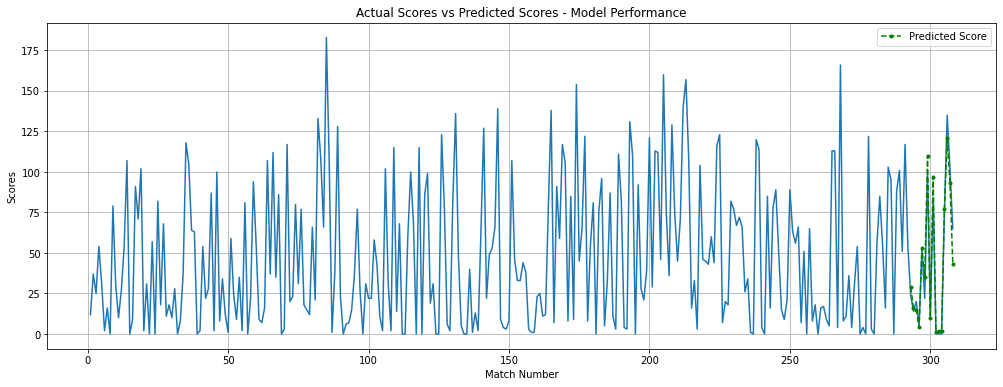

In [156]:

print('\n\n')
plt.figure(figsize=(17,6))
plt.plot(x['Match'].to_numpy() , y['Runs'].to_numpy())
plt.plot(xtest['Match'].to_numpy(), xtest['Predicted Score'].to_numpy() , color = 'green', marker = '.' ,linestyle = '--', label = 'Predicted Score')
plt.legend()
plt.title('Actual Scores vs Predicted Scores - Model Performance')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show() 